### Code 1 Prescreening

In [8]:
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
import pandas as pd
pd.set_option('max_columns', None)
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import scipy.io as sio
from itertools import islice
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, time
# import warnings
# warnings.filterwarnings('ignore')


#### [0] Load data
zos data along Bathymetry 300 for CMIP6 models and CMEMS observations

In [9]:
#[1] Select section and general parameters
m=loadmat('zos_data_B300_section.mat')
ndata = {n: m['row'][n][0,0] for n in m['row'].dtype.names}
dfm=pd.DataFrame.from_dict(dict((column, ndata[column][0]) for column in [n for n, v in ndata.items() if v.size == 1]))
NSeg=dfm['N'][0];KB_bloom=dfm['KB'][0];model=dfm['model'][0];
ns=dfm['Nstr'][0]; ne=dfm['Nend'][0];ss=dfm['Sstr'][0]; se=dfm['Send'][0];

#[2] KB data
G=int(KB_bloom[-1]) 
for Q in ['2Q']:     
    file='KB_data_{}2014L10G{}.csv'.format(Q,G)
    Kdf=pd.read_csv(file)
    kb=Kdf.iloc[:,-1].copy()
    kb[kb>0]=1
    kb[kb.isnull()]=0
    KBCC=Kdf['max_cells/L_raw_b1e5'].copy()
    KBCC[pd.isna(Kdf['n_days_bloom'])]=0
    if Q=='Q':
        KBQ=kb.to_numpy()
        KBCCQ=KBCC.to_numpy()
    elif Q=='2Q':
        KB2Q=kb.to_numpy()
        KBCC2Q=KBCC.to_numpy()
if KB_bloom[0]=='Q':
    nm=3;Q='Q';KB=KBQ    
elif KB_bloom[0]=='2':
    nm=6;Q='2Q';KB=KB2Q
print(KB_bloom,Q,NSeg,model,ne,ns,ss,se)

#[3] observation data
#(Obs)   CMEMS.AVISO-1-0.phy-001-030.r1.Omon.zos.gn (1 realization)
zosO=np.loadtxt('zos_data_B300_10_phy001_030_r1.csv',delimiter=',')
print('zos_obs:',zosO.shape)

#[4] zos model data
#(0-1)   CMIP6.HighResMIP.NCAR.CESM1-CAM5-SE-HR.hist-1950.r1i1p1f1.Omon.zos.gn (1 realization)   [Q 3]
#(1-2)   CMIP6.HighResMIP.CMCC.CMCC-CM2-HR4.hist-1950.r1i1p1f1.Omon.zos.gn (1 realization) [Q 2]
#(2-3)   CMIP6.HighResMIP.CMCC.CMCC-CM2-VHR4.hist-1950.r1i1p1f1.Omon.zos.gn (1 realization) [Q 2]
#(3-6)   CMIP6.HighResMIP.CNRM-CERFACS.CNRM-CM6-1-HR.hist-1950.r1i1p1f2.Omon.zos.gn (3 realizations)  [Q 1]
#(6-7)   CMIP6.CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.historical.r1i1p1f2.Omon.zos.gn (1 realizations) [Q 1]
#(7-12)  CMIP6.CMIP.E3SM-Project.ES3M-1-0.historical.r1i1p1f1.Omon.zos.gr (5 realizations) [Q 0]
#(12-15) CMIP6.HighResMIP.EC-Earth-Consortium.EC-Earth3P-HR.hist-1950.r1i1p2f1.Omon.zos.gn (3 realizations) [Q 0]
#(15-18) CMIP6.HighResMIP.EC-Earth-Consortium.EC-Earth3P.hist-1950.r1i1p2f1.Omon.zos.gn (3 realizations) [Q 4]
#(18-24) CMIP6.HighResMIP.ECMWF.ECMWF-IFS-HR.hist-1950.r1i1p1f1.Omon.zos.gn (6 realizations) [Q 5]
#(24-27) CMIP6.HighResMIP.ECMWF.ECMWF-IFS-MR.hist-1950.r1i1p1f1.Omon.zos.gn (3 realizations)[Q 5]
#(27-28) CMIP6.CMIP.NOAA-GFDL.GFDL-CM4.historical.r1i1p1f1.Omon.zos.gn (1 realizations) [Q 4]
#(28-30) CMIP6.CMIP.NOAA-GFDL.GFDL-ESM4.historical.r2i1p1f1.Omon.zos.gn (2 realizations) [Q 3]
#(30-31) CMIP6.HighResMIP.NERC.HadGEM3-GC31-HH.hist-1950.r1i1p1f1.Omon.zos.gn (1 realization)  [Q 5]
#(31-34) CMIP6.HighResMIP.MOHC.HadGEM3-GC31-HM.hist-1950.r1i1p1f1.Omon.zos.gn (3 realizations) [Q 5]
#(34-37) CMIP6.HighResMIP.MOHC.HadGEM3-GC31-MM.hist-1950.r1i1p1f1.Omon.zos.gn (3 realizations) [Q 5]
#(37-41) CMIP6.CMIP.MOHC.HadGEM3-GC31-MM.historical.r1i1p1f3.Omon.zos.gn (4 realizations) [Q 5]
zosMRaw=np.load('zos_data_B300_543210.npy')
print('zos_model:', zosMRaw.shape)
print ('Number of members:', zosMRaw.shape[0])


#Model info
df=pd.read_csv('zos_data_B300_members.csv')
display(df)

2QL10G5 2Q B-300 MSXP 22 9 59 78
zos_obs: (264, 119)
zos_model: (41, 264, 119)
Number of members: 41


,MIP_ERA,Activity,Institution_ID,Source_ID,Experiment_ID,Variant_Label,n_realizations,zos_size,Resolution,nominal_resolution
0,CMIP6,HighResMIP,NCAR,CESM1-CAM5-SE-HR,hist-1950,r1i1p1f1,1,"[3600,2400,780]",HR,25 km
1,CMIP6,HighResMIP,CMCC,CMCC-CM2-HR4,hist-1950,r1i1p1f1,1,"[1442,1051,12]",HR,25 km
2,CMIP6,HighResMIP,CMCC,CMCC-CM2-VHR4,hist-1950,r1i1p1f1,1,"[1442,1051,12]",HR,25 km
3,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r1i1p1f2,3,"[1442,1050,120]",HR,25 km
4,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r2i1p1f2,0,"[1442,1050,120]",HR,25 km
5,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r3i1p1f2,0,"[1442,1050,120]",HR,25 km
6,CMIP6,CMIP,CNRM-CERFACS,CNRM-CM6-1-HR,historical,r1i1p1f2,1,"[1442,1050,1980]",HR,25 km
7,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,5,"[360,180,60]",LR,100 km
8,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r2i1p1f1,0,"[360,180,60]",LR,100 km
9,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r3i1p1f1,0,"[360,180,60]",LR,100 km


#### [1] Prescreening predictors 
For Loop Current north (LC-N) and Loop Current south (LC-S) given 2Q (i.e., 6 month perid): <br>
(1) resolve observed physical phenomena (Yes / No) <br>
(2) frequency of an oscillation(LC-N, LC-S), <br>
(3) temproal-match(LC-N, LC-S,Total) <br>
(4) RMSE(Total) for each member, model, and group (Table 1-3)

In [10]:
def predictos(resm,member,KB,LCO,LC,Institution_ID,Source_ID,ensemble_size,Flag):
    
    #Info
    if Flag==1:
        resm.loc[member,'Institution_ID']=Institution_ID
        resm.loc[member,'Source_ID']=Source_ID
        resm.loc[member,'e_size']=ensemble_size
    
    #KB Blooms and LC counts
    resm.loc[member,'KB']=(KB>0).sum()
    resm.loc[member,'LCN']=(LC>=0).sum()
    resm.loc[member,'LCS']=(LC<0).sum()
    resm.loc[member,'LCN_NB']=((LC>=0) & (KB==0)).sum()
    resm.loc[member,'LCN_B']=((LC>=0) & (KB>0)).sum()
    resm.loc[member,'LCS_NB']=((LC<0)  & (KB==0)).sum()
    resm.loc[member,'LCS_B']=((LC<0)  & (KB>0)).sum()
    resm.loc[member,'Err_KB']= np.round(resm.loc[member,'LCS_B']/resm.loc[member,'KB'],decimals=3)

    #Temporal match between observation and model
    resm.loc[member,'Match_LCN']=((LC>=0) & (LCO>=0)).sum()    
    resm.loc[member,'Match_LCS']=((LC<0) & (LCO<0)).sum()  
    resm.loc[member,'Match_Tot']=resm.loc[member,'Match_LCN']+resm.loc[member,'Match_LCS']

    #Temporal error between observation and model
    resm.loc[member,'Err_LCN']=0
    resm.loc[member,'Err_LCS']=0
    resm.loc[member,'Err_Tot']=0

    #Temporal error between AVISO and model
    if member =='obs':
        resm.loc[member,'Err_LCN']=0
        resm.loc[member,'Err_LCS']=0
        resm.loc[member,'Err_Tot']=0
    else:
        resm.loc[member,'Err_LCN']=np.round((resm.loc['obs','LCN']-resm.loc[member,'Match_LCN'])/resm.loc['obs','LCN'],decimals=3)
        resm.loc[member,'Err_LCS']=np.round((resm.loc['obs','LCS']-resm.loc[member,'Match_LCS'])/resm.loc['obs','LCS'],decimals=3)
        resm.loc[member,'Err_Tot']=np.round((len(LCO)-resm.loc[member,'Match_Tot'])/len(LCO),decimals=3)

    #RMSE between AVISO and model
    resm.loc[member,'RMSE']=np.round(np.sqrt(np.mean(np.square(LC-LCO)))*1e2,decimals=2)

    return resm

In [11]:
def prescreeningTables(MN):
    
    #[1] Create prior ensemble
    zosM=[]
    zosMstd=[]
    dfinfo = pd.DataFrame(columns=['Institution_ID','Source_ID','ensemble_size'])
    for n in range(len(NM)):
        #Select an member
        Str=sum(NM[0:n])
        End=sum(NM[0:n])+NM[n]
        temp=zosMRaw[Str:End,:,:]
        temp[temp>1e3]=np.nan
        zosA=np.nanmean(temp, axis=0)
        zosAstd=np.nanstd(temp,axis=0)

        #Append info 
        dfinfo = dfinfo.append({'Institution_ID':df.loc[Str,'Institution_ID'], 'Source_ID':df.loc[Str,'Source_ID'], \
                                'ensemble_size':NM[n]}, ignore_index=True)

        #Append members
        zosM.append(zosA)
        zosMstd.append(zosAstd)  
    zosM= np.stack(zosM)
    zosMstd= np.stack(zosMstd)
    #print('Prior members',zosMRaw.shape, '-> Prior ensemble',zosM.shape,zosMstd.shape)
    

    #[2] Performance of each member 
    #(2.1)Create results dataframe
    members=['obs', *['Member{}'.format(n) for  n in range(len(NM))]]
    columns=['Institution_ID','Source_ID','e_size', \
             'KB','LCN','LCS','LCN_NB','LCN_B','LCS_NB','LCS_B','Err_KB', \
             'Match_LCN','Match_LCS','Match_Tot','Err_LCN','Err_LCS','Err_Tot','RMSE','Score']
    resm = pd.DataFrame(columns = columns,index=members)

    #(2.2) Create zos dataframe
    columns=['KB','obs', *['Member{}'.format(n) for  n in range(len(NM))]]
    Q=pd.date_range('1993-01-01', periods=44, freq='2Q',closed='left')
    dfzos = pd.DataFrame(columns=columns,index=Q)
    dfzos.KB=KB

    #(2.3) Observation data processing 
    DO=(np.nanmean(zosO[:,ns:ne], axis=1) - np.nanmean(zosO[:,ss:se], axis=1))
    LCO=DO.reshape((-1,nm),order='C').max(axis=1)
    member='obs'
    Institution_ID= 'CMEMS'
    Source_ID= 'phy-001-030'
    ensemble_size=1
    resm=predictos(resm,member,KB,LCO,LCO,Institution_ID,Source_ID,ensemble_size,Flag=1)
    dfzos.obs=LCO
    
    #(2.4) Model data processing 
    for n in range(len(NM)):
        #(MSXP) mean_segment(delta-north-south), max_period
        DM=(np.nanmean(zosM[n,:,ns:ne], axis=1) - np.nanmean(zosM[n,:,ss:se], axis=1))
        LCM=DM.reshape((-1,nm),order='C').max(axis=1)
        member='Member{}'.format(n)
        Institution_ID=dfinfo.loc[n,'Institution_ID']
        Source_ID=dfinfo.loc[n,'Source_ID']
        ensemble_size=dfinfo.loc[n,'ensemble_size']
        resm=predictos(resm,member,KB,LCO,LCM,Institution_ID,Source_ID,ensemble_size,Flag=1)
        dfzos['Member{}'.format(n)]=LCM
    
    #(2.4) Display results table
    display(resm)
    display(dfzos)

    return resm,dfzos

In [12]:
#Model Independence 
MI=3
if MI==1:
    #member (all members all independent)
    NM =np.ones(zosMRaw.shape[0], dtype = int) 
    print('Ensemble size:', len(NM), 'members')

elif MI==2:
    #model (all models are independent)
    NM=np.array([1,1,1,3,1,5,3,3,6,3,1,2,1,3,3,4])
    print('ensemble size:', len(NM), 'models')

elif MI==3:
    #model (all models are independent)
    NM=np.array([1,2,4,5,3,3,6,3,3,4,7])
    #NM=np.array([1,2,4,5,3,3,6,3,3,4,3,4])
    print('ensemble size:', len(NM), 'groups-model')

elif MI==4:
    #group (all groups are independent)
    NM=np.array([1,2,4,5,3,3,9,3,11])
    print('ensemble size:', len(NM), 'groups')  
    
#Process model predictors
resm,dfzos=prescreeningTables(NM)   



ensemble size: 11 groups-model


,Institution_ID,Source_ID,e_size,KB,LCN,LCS,LCN_NB,LCN_B,LCS_NB,LCS_B,Err_KB,Match_LCN,Match_LCS,Match_Tot,Err_LCN,Err_LCS,Err_Tot,RMSE,Score
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,NaN
Member0,NCAR,CESM1-CAM5-SE-HR,1,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,13.16,NaN
Member1,CMCC,CMCC-CM2-HR4,2,15,20,24,14,6,15,9,0.6,15,7,22,0.531,0.417,0.5,5.48,NaN
Member2,CNRM-CERFACS,CNRM-CM6-1-HR,4,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,4.02,NaN
Member3,E3SM-Project,E3SM-1-0,5,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,9.27,NaN
Member4,EC-Earth-Consortium,EC-Earth3P,3,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,20.16,NaN
Member5,EC-Earth-Consortium,EC-Earth3P-HR,3,15,20,24,13,7,16,8,0.533,13,5,18,0.594,0.583,0.591,4.34,NaN
Member6,ECMWF,ECMWF-IFS-HR,6,15,31,13,21,10,8,5,0.333,24,5,29,0.25,0.583,0.341,3.77,NaN
Member7,ECMWF,ECMWF-IFS-MR,3,15,36,8,22,14,7,1,0.067,28,4,32,0.125,0.667,0.273,3.87,NaN
Member8,NOAA-GFDL,GFDL-CM4,3,15,8,36,6,2,23,13,0.867,5,9,14,0.844,0.25,0.682,5.06,NaN


,KB,obs,Member0,Member1,Member2,Member3,Member4,Member5,Member6,Member7,Member8,Member9,Member10
1993-03-31,0.0,-0.015295,0.108309,-0.040778,0.030844,-0.069744,-0.196031,-0.010294,0.004217,0.005567,-0.010312,0.013663,-0.023629
1993-09-30,0.0,0.049253,0.150834,-0.002731,0.049301,-0.060755,-0.174963,0.005493,0.011208,0.012835,0.000081,0.008605,0.006537
1994-03-31,0.0,-0.008208,0.134248,-0.030630,0.031674,-0.078491,-0.194380,0.003346,-0.005369,-0.003256,0.012370,0.021474,-0.004786
1994-09-30,1.0,0.055925,0.156053,-0.008283,0.071779,-0.058432,-0.173772,-0.019861,0.025057,0.035403,0.018459,0.062062,0.015870
1995-03-31,0.0,0.023005,0.113367,-0.007222,0.032141,-0.071655,-0.197719,-0.014300,0.030280,0.014185,-0.011826,0.061440,-0.018569
1995-09-30,1.0,0.016716,0.187293,0.036235,0.054570,-0.054041,-0.156739,-0.013773,0.037514,0.030749,-0.021089,0.047965,-0.004174
1996-03-31,1.0,0.046197,0.111197,-0.018158,0.029844,-0.064393,-0.183701,0.010928,-0.010024,0.010511,0.009518,-0.003237,0.019161
1996-09-30,0.0,-0.038086,0.108343,-0.054443,0.042416,-0.044765,-0.163094,0.017840,0.012358,0.045795,0.005349,0.042720,0.060481
1997-03-31,0.0,0.048544,0.247106,-0.038475,0.038204,-0.067387,-0.205272,-0.011472,0.004324,0.019312,-0.015280,0.015439,0.015405
1997-09-30,0.0,0.009254,0.164616,0.017020,0.050841,-0.048214,-0.177648,0.009106,0.002647,0.049189,-0.012205,0.018901,0.028068


In [13]:
#Select IMS with score from zero to three
#Obs, Score0 IMS04 E3SM,Score1 IMS03 CNRM, Score2 IMS02 CMCC, Score3 IMS10 HamGEM3-MM
resm=resm.reindex(['obs', 'obs','Member3', 'Member2', 'Member8', 'Member10'])
dfzos=dfzos[['KB', 'obs', 'obs', 'Member3', 'Member2', 'Member8', 'Member10']]
display(resm)
display(dfzos)


,Institution_ID,Source_ID,e_size,KB,LCN,LCS,LCN_NB,LCN_B,LCS_NB,LCS_B,Err_KB,Match_LCN,Match_LCS,Match_Tot,Err_LCN,Err_LCS,Err_Tot,RMSE,Score
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,NaN
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,NaN
Member3,E3SM-Project,E3SM-1-0,5,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,9.27,NaN
Member2,CNRM-CERFACS,CNRM-CM6-1-HR,4,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,4.02,NaN
Member8,NOAA-GFDL,GFDL-CM4,3,15,8,36,6,2,23,13,0.867,5,9,14,0.844,0.25,0.682,5.06,NaN
Member10,MOHC,HadGEM3-GC31-MM,7,15,30,14,20,10,9,5,0.333,22,4,26,0.312,0.667,0.409,4.08,NaN


,KB,obs,obs,Member3,Member2,Member8,Member10
1993-03-31,0.0,-0.015295,-0.015295,-0.069744,0.030844,-0.010312,-0.023629
1993-09-30,0.0,0.049253,0.049253,-0.060755,0.049301,0.000081,0.006537
1994-03-31,0.0,-0.008208,-0.008208,-0.078491,0.031674,0.012370,-0.004786
1994-09-30,1.0,0.055925,0.055925,-0.058432,0.071779,0.018459,0.015870
1995-03-31,0.0,0.023005,0.023005,-0.071655,0.032141,-0.011826,-0.018569
1995-09-30,1.0,0.016716,0.016716,-0.054041,0.054570,-0.021089,-0.004174
1996-03-31,1.0,0.046197,0.046197,-0.064393,0.029844,0.009518,0.019161
1996-09-30,0.0,-0.038086,-0.038086,-0.044765,0.042416,0.005349,0.060481
1997-03-31,0.0,0.048544,0.048544,-0.067387,0.038204,-0.015280,0.015405
1997-09-30,0.0,0.009254,0.009254,-0.048214,0.050841,-0.012205,0.028068


#### [2] Visualize zos time series data

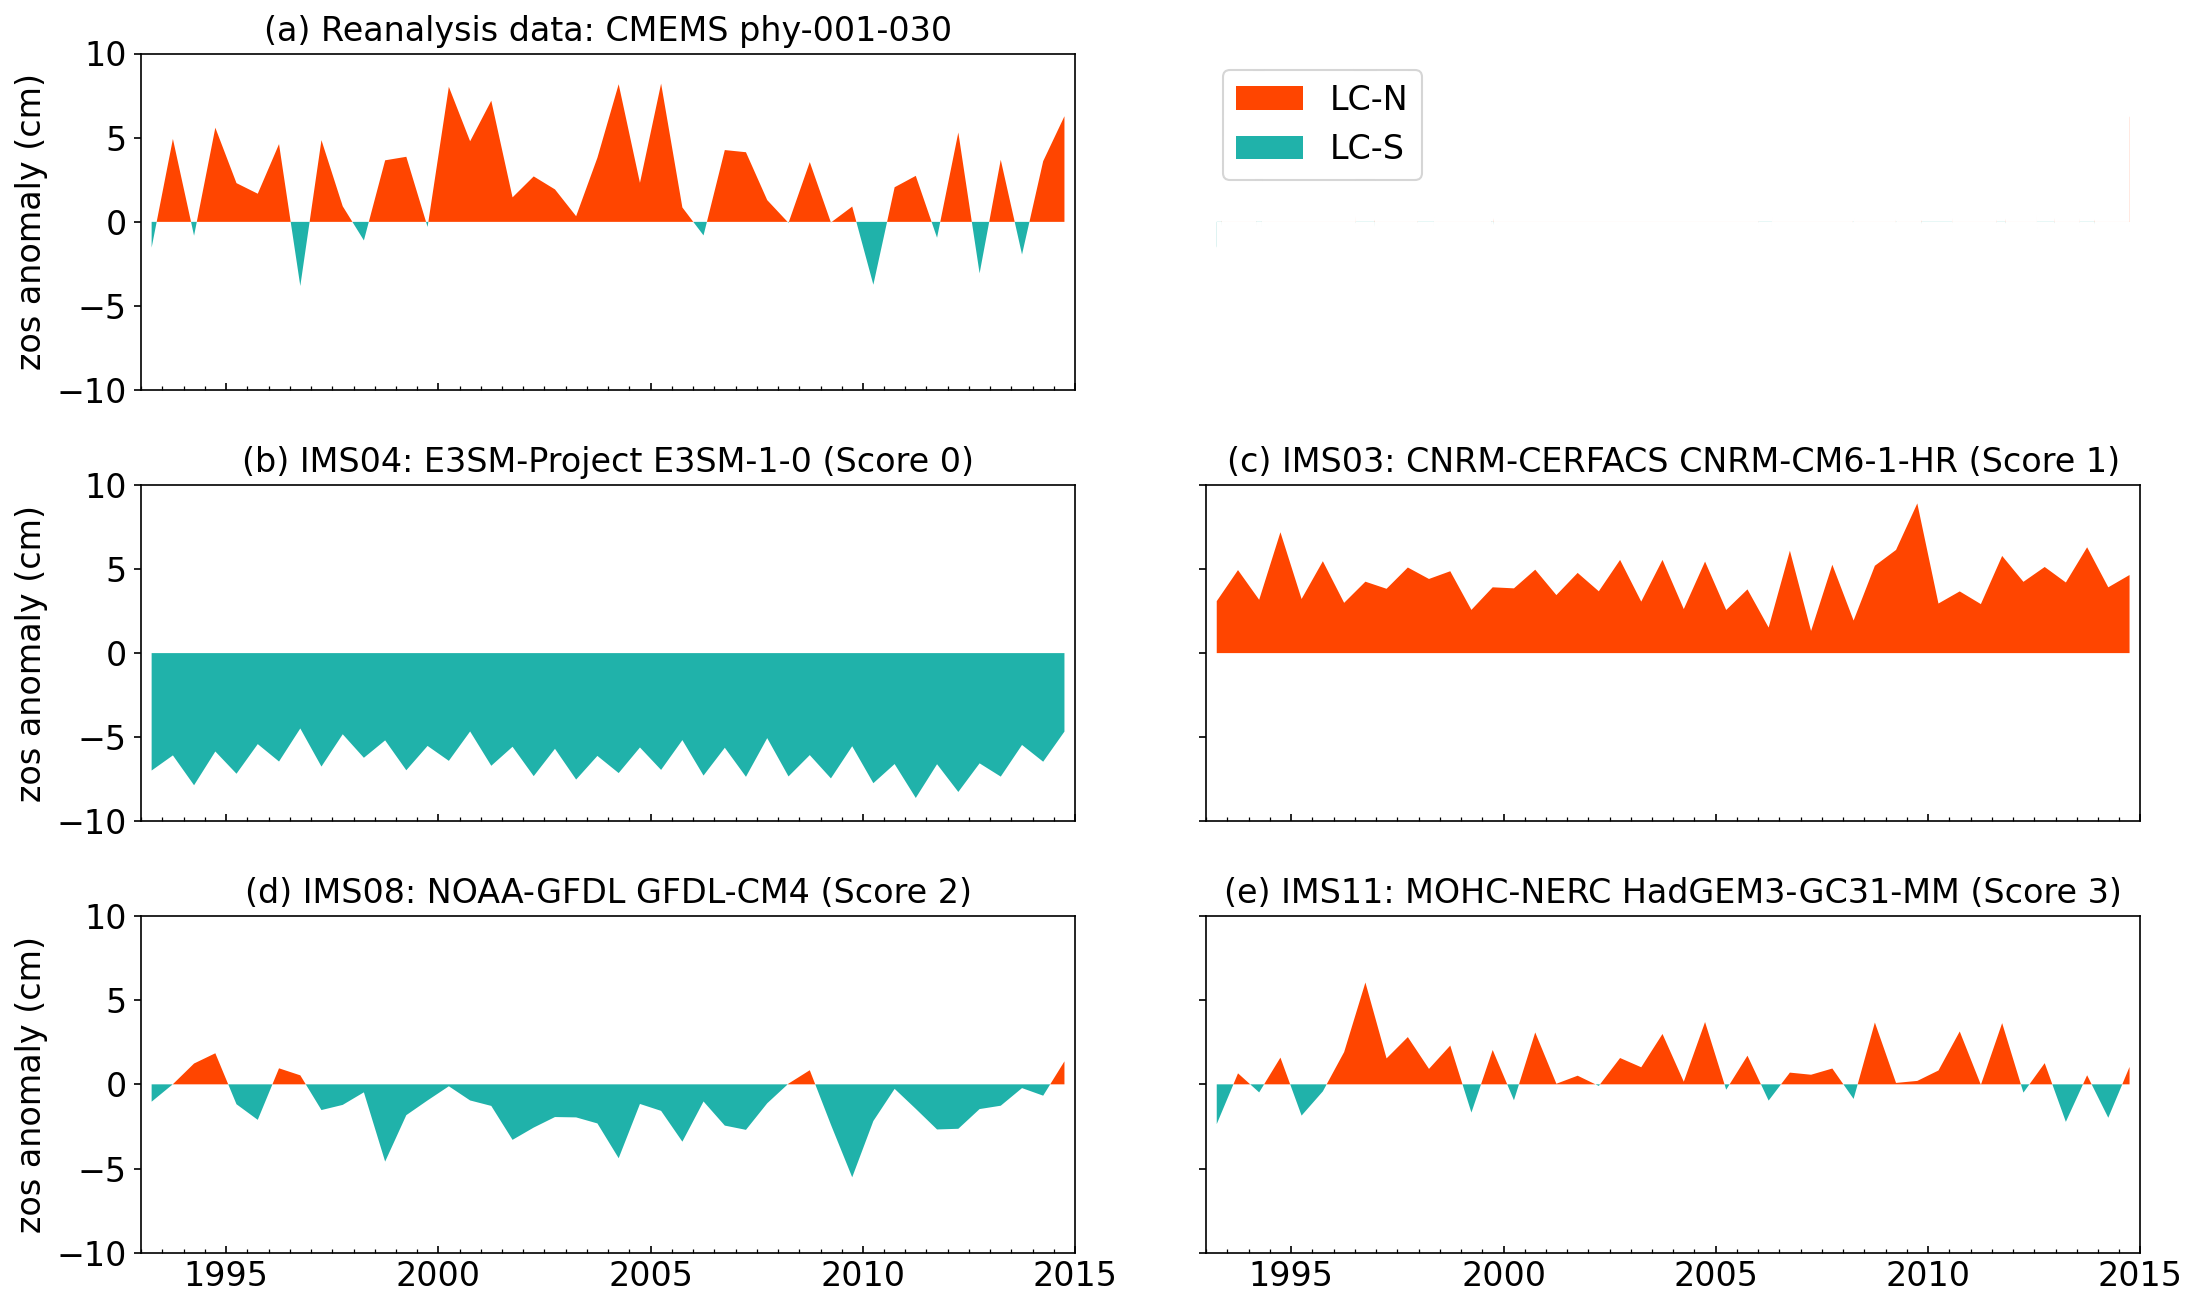

,Institution_ID,Source_ID,e_size,KB,LCN,LCS,LCN_NB,LCN_B,LCS_NB,LCS_B,Err_KB,Match_LCN,Match_LCS,Match_Tot,Err_LCN,Err_LCS,Err_Tot,RMSE,Score
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,3
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,3
Member3,E3SM-Project,E3SM-1-0,5,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,9.27,0
Member2,CNRM-CERFACS,CNRM-CM6-1-HR,4,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,4.02,1
Member8,NOAA-GFDL,GFDL-CM4,3,15,8,36,6,2,23,13,0.867,5,9,14,0.844,0.25,0.682,5.06,2
Member10,MOHC,HadGEM3-GC31-MM,7,15,30,14,20,10,9,5,0.333,22,4,26,0.312,0.667,0.409,4.08,3


In [14]:
#def plot_zos(df,Plot,Period,count,fig):
#[0] Plot style 
# for count,Plot in enumerate(['LCA','LCM','LCMW']):
#     plot_zos(df,Plot,Period,count,fig)
#Plot area/bar 
Period='2Q'
members=['obs', 'obs','Member3', 'Member2', 'Member8', 'Member10']
FigNum=['a','a','b','c','d','e']

#[1] chart size 
plt.rcParams['font.size'] = '16'

fig, axes = plt.subplots(3,2, figsize=(15,9), sharex=True, sharey=True, dpi=150)  #width, height
#fig=plt.figure(figsize=(15,15),dpi=100)

for nax, ax in enumerate(axes.ravel()):
    
    #[1] Select memeber
    member=members[nax]
    
    #[2] Select data
    x=dfzos.index.copy()
    if nax<2:
        y=dfzos.iloc[:,1]*100
    else:
        y=dfzos[member]*100

    #[2] Member score
    #Score
    Score=0
    LCN=sum(y>=0)
    LCS=sum(y<0)
    #(1) Simulate Warm current
    if LCN>0:
        Score+=1
        #(2) Simulate warm and cool current
        if (LCN>0 and LCS>0):
            Score+=1
    #(3) frequency LC-N > LC-S
    if LCS>0:
        if LCN>=LCS:
            Score+=1
        #(4) Delta zos above threshold 
        if Score==1:
            #SSH value
            if min(y)>-5:
                Score+=1   
    resm.loc[member,'Score']=Score
    
    #[3] Plot bar/area chart 
    if Period=='Q':
        BarW=92
    elif Period=='2Q':
        BarW=181
    
    #colors=['red','green']
    c0=['orangered','tomato']
    c1=['lightseagreen']
    
    
    
    ax.fill_between(x, y, 0, where=y >= 0, facecolor=c0[0], interpolate=True, alpha=1,label='LC-N')
    ax.fill_between(x, y, 0, where=y <= 0, facecolor=c1[0], interpolate=True, alpha=1,label='LC-S')       
    if nax==1:
        ax.legend(loc='upper left')
        
    #Empty subplot with label legend only
    if nax==1:
        ax.fill_between(x, y*10, facecolor='white', interpolate=True)
        ax.fill_between(x, y*10, facecolor='white', interpolate=True)       
        ax.axis('off')
        for spine in ax.spines.values():
            spine.set_visible(False)
        continue 


    #[4] format the x-ticks and labels
    years = mdates.YearLocator(5)   # every year
    if Period=='Q':
        months = mdates.MonthLocator(bymonth=[1,4,7,10,13])  # every month
    elif Period=='2Q':
        months = mdates.MonthLocator(bymonth=[1,7,13])  # every month
    years_fmt = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_locator(months)
    #if pn<=4:
    #    ax.set_xticklabels([])
    # # Set tick font size
    # for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(12)


    #[5] x-axis limit
    Start=1993
    End=2015
    start = datetime(year=Start, month=1, day=1, hour=0)
    end   = datetime(year=End, month=1, day=1, hour=0)
    ax.set_xlim(start,end)
    
    #if (pn != 2) and (pn != 6):
    ax.set_ylim(-10,10)

        
    #[6] Axis labels
    if (nax % 2) == 0:
        ax.set_ylabel('zos anomaly (cm)', alpha=1)
        
    ax.tick_params(axis='x',direction='in')
    ax.tick_params(which='minor', direction='in')


    #[7] Legend
    #if nax==2:
    #    ax.legend(loc='upper right')
    #else:
    #    ax.legend(loc='lower right')

        
    #[8] Grid
    PlotType=0
    if PlotType==1:
        ax.grid(which='major', axis='x')


        
    #[9] Title
    #0, Obs
    #1, Score0 IMS04 E3SM
    #2, Score1 IMS03 CNRM
    #3, Score2 IMS02 CMCC
    #4, Score3 IMS10 HamGEM3-MM
    Institution_ID=resm.loc[member,'Institution_ID']
    Source_ID=resm.loc[member,'Source_ID']
    if nax==0:
        Plot='Reanalysis data'
        Institution_ID=resm.iloc[0,0]
        Source_ID=resm.iloc[0,1]
        Title='({}) {}: {} {}'.format(FigNum[nax],Plot,Institution_ID,Source_ID)
    elif nax==2:
        IMSN=4
    elif nax==3:
        IMSN=3
    elif nax==4:
        #IMS2: 'CMCC-CM2-(V)HR4'
        #Source_ID='CMCC-CM2-(V)HR4'
        #IMSN=2
        IMSN=8
    elif nax==5:
        #IMS11 MOHC-NERC
        Institution_ID='MOHC-NERC'
        IMSN=11
    
    if nax>0:
        Plot='IMS{:02d}'.format(IMSN)
        Title='({}) {}: {} {} (Score {})'.format(FigNum[nax],Plot,Institution_ID,Source_ID,Score)

    ax.set_title(Title,alpha=1,fontsize=16)
    
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)
plt.tight_layout()

#[10] Save plot and table
plt.savefig('res_Fig02_Data_ESMs.tif',bbox_inches='tight')
#resm.to_csv('Results/Table2_members_score.csv')

#[11] Display results
plt.show()
display(resm)